In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte

%matplotlib inline

In [2]:
#constants in cgs units
m_e = 9.109*(10**-28)
q = 4.803*(10**-10)
h=6.626*(10**-27)
c = 2.99 * (10**10)
k = 1.381 * (10**-16)
m_h = 1.67 * (10**-27) *1000

# Problem H.a

In [3]:
#function for finding v_n. returns in Hertz
def frequency_cutoff(n):

    return (2 * (np.pi**2) * m_e * (q**4)) / ((h**3) * (n**2))

In [4]:
#function for finding cross section for a given n (note that it assumes that v>v_n) 
def cross_section_n(v,n,T):
    exp_x = -(2 * (1 - (1/(n**2))) * (np.pi**2) * m_e * (q**4)) / ((h**2) * k * T)
    return (64 * (np.pi**4) * m_e * (q**10) * np.exp(exp_x)  )/ (3 * np.sqrt(3) * (h**6) * (v**3) * (n**3) * c) 

Function for finding the total cross section for a given frequency. We chose n=20 as the cut off point by graphing the form of the function (n^-3 * e^-(1-1/n^2) and noting that it dropped below 10^-3 by n=10. To be on the safe side we added some more terms in, since the code runs fast enough that it doesn't make too much of a difference. It also ended up being useful as it made the lower limit of frequency we could calculate almost exactly 10^13. 

In [5]:
#function for finding total cross section.
def cross_section(v,T):
    sig = 0
    for n in range(1,21):
        if v > frequency_cutoff(n):
            sig += cross_section_n(v,n,T)
    return sig

Crossection for frequencies between 10^14 and 10^17 Hertz with T=5800K. Went up to 10^17 as a limit I think it more clearly shows the final peak in crossection. Each peak corresponds to an energy level, since they occur when v becomes greater than the next v_n. The last peak is at v=v_1 = 3*10^15. 

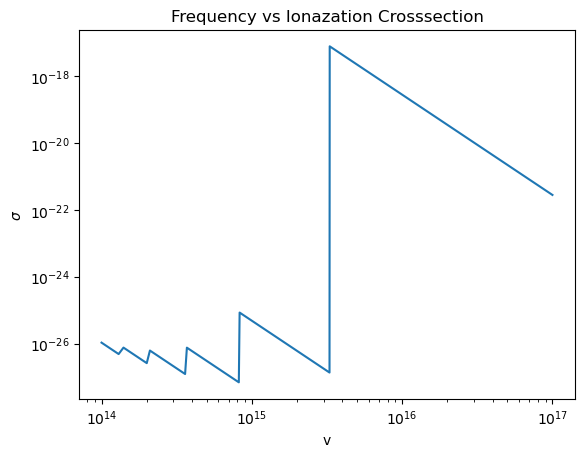

In [6]:
x = np.linspace(10**14,10**17,10**4)
y = []
    
for i in range(len(x)):
    y.append(cross_section(x[i],5800))

plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\sigma$')

plt.xlabel('v')
plt.title('Frequency vs Ionazation Crosssection')
plt.show()

# H.b

In [13]:
#finds the opacity from the crossection
def kappa(sig):
    return sig/m_h


In [8]:
#planck's function in terms of frequency and temperature
def black_body(v,T):
    return 2 * h * (v**3) / ((c**2)*(np.exp(h*v/(k*T))-1))
    

In [9]:
#the top integrand 
def top_integrand(v,T):
    return black_body(v,T)/kappa(cross_section(v,T))

Finding the Rosseland mean opacity. The bounds were found via graphing both the top integrand and the blackbody function and cutting them off in order to make the numerical integration easier. Because we cut off the crosssection function at n=20, any frequency below v_20 has a crossection of 0. The blackbody formula overflows above 10^16, so we cut it off there, noting that both the top integrand and the blackbody function itself are both rapidly decreasing in magnitude past 10^16 and therefore no longer contributing substantially to the integral. 

In [22]:
inverse_kappa = inte.quad(top_integrand,frequency_cutoff(20),10**16,limit=10**5, args=5800)[0]/inte.quad(black_body,1,10**16,args=5800)[0]

In [25]:
Rosseland = 1 / inverse_kappa 
print(Rosseland)

0.001503151462304475
